# 基本操作

## Tensor和变量

### 注意

+ [a,b]和[[a,b]]不一样，前者仅代表一维向量，后者代表二维张量，只有一行。
+ 在绘图时使用detach避免累积梯度

### 以_ 结尾的操作

**任何 以``_`` 结尾的操作都会用结果替换原变量**. 例如: ``x.copy_(y)``, ``x.t_()``, 都会改变 ``x``.

In [1]:
import torch

x=torch.tensor([1,2])
y=torch.tensor([3,4])
z=x.add(y)
print(z)
print(x)
x.add_(y)
print(x)

tensor([4, 6])
tensor([1, 2])
tensor([4, 6])


### 创建tensor

In [2]:
import torch

#根据list数据生成tensor
torch.Tensor([1,2,3,4,5,6])
#根据指定形状生成tensor，初始值随机
torch.Tensor(2,3)
#根据给定的tensor的形状
t=torch.Tensor([[1,2,3],[4,5,6]])
#查看tensor的形状
t.size()
#shape与size()等价方式
t.shape
#根据已有形状创建tensor
torch.Tensor(t.size())

tensor([[6.1935e+10, 6.8523e-43, 3.0000e+00],
        [4.0000e+00, 0.0000e+00, 0.0000e+00]])

+ torch.Tensor是torch.empty和torch.tensor之间的一种混合，但是，当传入数据时，torch.Tensor使用全局默认dtype（FloatTensor），torch.tensor从数据中推断数据类型。
<br>
+ torch.tensor(1)返回一个固定值1，而torch.Tensor(1)返回一个大小为1的张量，它是随机初始化的值。

In [ ]:
import torch

#生成一个单位矩阵
torch.eye(2,2)
#自动生成全是0的矩阵
torch.zeros(2,3)
#根据规则生成数据
torch.linspace(1,10,4)
#生成满足均匀分布随机数
torch.rand(2,3)
#生成满足标准分布随机数
torch.randn(2,3)
#返回所给数据形状相同，值全为0的张量
torch.zeros_like(torch.rand(2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### 修改tensor的形状

1. dim()返回维度
2. view()将张量变成指定形状（最好使用reshape）
1. unsqueeze()给向量增加一个维度
1. numel()返回元素个数
1. len()返回二维矩阵的行数

In [12]:
import torch

#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
#查看矩阵的形状
x.size()   #结果为torch.Size([2, 3])

#查看x的维度
x.dim()    #结果为2
#把x变为3x2的矩阵
x.view(3,2)
#把x展平为1维向量
y=x.view(-1)  
y.shape
#添加一个维度
z=torch.unsqueeze(y,0)
#查看z的形状
z.size()   #结果为torch.Size([1, 6])
#计算Z的元素个数
z.numel()   #结果为6

6

In [31]:
z=torch.unsqueeze(y,1)
z.shape

torch.Size([6, 1])

In [2]:
len(torch.rand(2,3))

2

In [11]:
torch.arange(12).view(4,3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

### 索引操作

1. x[row,col]  
+ 以逗号隔开行和列
+ 以:表示选择所有
+ row和col可以表示为[a,b]和[c,d]
+ 以[a,b,c...]指定行号或列号

2. torch.masked_select()以第二个布尔张量过滤第一个张量

In [25]:
import torch

#设置一个随机种子
torch.manual_seed(100) 
#生成一个形状为2x3的矩阵
x = torch.randn(3, 3)
#根据索引获取第1行，所有数据
x[0,:]
#获取最后一列数据
x[:,-1]
x,x[1:2,1:2]

(tensor([[ 0.3607, -0.2859, -0.3938],
         [ 0.2429, -1.3833, -2.3134],
         [-0.3172, -0.8660,  1.7482]]), tensor([[-1.3833]]))

In [3]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
# 0,0和1,2两个点
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [27]:
#生成是否大于0的Byter张量
mask=x>0
#获取x中大于0的值
torch.masked_select(x,mask)

tensor([0.3607, 0.2429, 1.7482])

In [32]:
#获取非0下标,即行，列索引
torch.nonzero(mask)
#获取指定索引对应的值,输出根据以下规则得到
#out[i][j] = input[index[i][j]][j]  # if dim == 0
#out[i][j] = input[i][index[i][j]]  # if dim == 1
index=torch.LongTensor([[0,1,1]])
torch.gather(x,0,index)
index=torch.LongTensor([[0,1,1],[1,1,1]])
a=torch.gather(x,1,index)
#把a的值返回到一个2x3的0矩阵中
z=torch.zeros(2,3)
z.scatter_(1,index,a)

tensor([[ 0.3607, -0.2859,  0.0000],
        [ 0.0000, -1.3833,  0.0000]])

### 广播机制

In [28]:
import torch
import numpy as np

A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
#把ndarray转换为Tensor
A1=torch.from_numpy(A)  #形状为4x1
B1=torch.from_numpy(B)  #形状为3
#Tensor自动实现广播
C=A1+B1
#我们可以根据广播机制，手工进行配置
#根据规则1，B1需要向A1看齐，把B变为（1,3）
B2=B1.unsqueeze(0)  #B2的形状为1x3
#使用expand函数重复数组，分别的4x3的矩阵
A2=A1.expand(4,3)
B3=B2.expand(4,3)
#然后进行相加,C1与C结果一致
C1=A2+B3
print(C1)

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]], dtype=torch.int32)


### 遂元操作

torch.addcdiv:$\text{out}_i = \text{input}_i + \text{value} \times \frac{\text{tensor1}_i}{\text{tensor2}_i}$

torch.clamp:$y_i = \min(\max(x_i, \text{min\_value}), \text{max\_value})$

In [45]:
import torch

torch.manual_seed(1000)
t = torch.randn(1, 3)
t1 = torch.randn(3, 1)
t2 = torch.randn(1, 3)
#t+0.1*(t1/t2)
torch.addcdiv(t, 0.1, t1, t2)
#计算sigmoid
torch.sigmoid(t)
#将t限制在[0,1]之间
torch.clamp(t,0,1)
#t+2进行就地运算
t.add_(2)

tensor([[0.8280, 1.6071, 2.5265]])

### 归并操作

In [50]:
import torch

#生成一个含6个数的向量
a=torch.linspace(0,10,6)
#使用view方法，把a变为2x3矩阵
a=a.view((2,3))
#沿y轴方向累加，即dim=0
b=a.sum(dim=0)   #b的形状为[3]
#沿y轴方向累加，即dim=0,并保留含1的维度
b=a.sum(dim=0,keepdim=True) #b的形状为[1,3]
b

tensor([[ 6., 10., 14.]])

### 比较操作

In [51]:
import torch

x=torch.linspace(0,10,6).view(2,3)
#求所有元素的最大值
torch.max(x)   #结果为10
#求y轴方向的最大值
torch.max(x,dim=0)  #结果为[6,8,10]
#求最大的2个元素
torch.topk(x,1,dim=0)  #结果为[6,8,10],对应索引为tensor([[1, 1, 1]

torch.return_types.topk(values=tensor([[ 6.,  8., 10.]]), indices=tensor([[1, 1, 1]]))

### 矩阵操作

+ torch.dot接收两个一维向量，并按对应位置相乘，最后返回总和
+ bmm是两个三维张量相乘，两个输入tensor维度是$( b × n × m )和( b × m × p ) $, 第一维b代表batch size，输出为$( b × n × p ) $
+ torch.matmul和torch.mm均是矩阵乘法，但不同的是torch.matmul可以是二维以上的矩阵

In [55]:
import torch

a=torch.tensor([2, 3])
b=torch.tensor([3, 4])

torch.dot(a,b)  #运行结果为18
x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))
print(x,y,torch.mm(x,y),sep='\n')

tensor([[2, 7, 8],
        [9, 3, 7]])
tensor([[5, 2, 5, 0],
        [5, 4, 3, 1],
        [0, 5, 5, 5]])
tensor([[45, 72, 71, 47],
        [60, 65, 89, 38]])


In [57]:
x=torch.randint(10,(2,2,3))
y=torch.randint(6,(2,3,4))

print(x,y,torch.bmm(x,y),sep='\n')

tensor([[[7, 3, 1],
         [9, 2, 1]],

        [[8, 5, 0],
         [4, 1, 5]]])
tensor([[[2, 1, 3, 0],
         [3, 0, 2, 1],
         [5, 3, 4, 1]],

        [[2, 3, 5, 0],
         [3, 1, 1, 5],
         [1, 1, 1, 2]]])
tensor([[[28, 10, 31,  4],
         [29, 12, 35,  3]],

        [[31, 29, 45, 25],
         [16, 18, 26, 15]]])


## 自动求导

1. 声明变量x时使用requires_grad=True来告知需要求导
2. 对于运算输出变量使用y.**backward()**来自动求导，**backward必须作用于标量上**（也就是说需要经过sum等处理）
3. 使用x.grad来获取梯度
4. 使用x.grad.zero_()来清空梯度
1. 使用y.detach()将y分离在计算图之外，即将在求导时将y作为常量，返回一个新的Variable，从当前计算图中分离下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个Variable永远不需要计算其梯度，不具有grad。

In [62]:
import torch
x = torch.arange(4.0,requires_grad = True)
y = torch.dot(x,x)
y.backward()
print(y,x.grad)
x.grad.zero_()

tensor(14., grad_fn=<DotBackward>) tensor([0., 2., 4., 6.])


tensor([0., 0., 0., 0.])

In [29]:
import torch
x = torch.arange(4.0,requires_grad = True)
y = torch.dot(x,x)
y.backward()
x.grad

tensor([0., 2., 4., 6.])

In [67]:
x.grad.zero_()
y = x * x
u = y.detach()   # 将y分离在计算图之外
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

### 常用

1. with torch.no_grad(): 块内的计算将不会求导数

In [ ]:
with torch.no_grad():
    for param in params:
        param -= lr * param.grad / batch_size
        param.grad.zero_()

## 常用函数

### random.shuffle
打乱数组顺序（无返回值）

In [6]:
import random
indices = list(range(10))
random.shuffle(indices)
indices

[4, 9, 3, 5, 1, 0, 7, 8, 2, 6]

### 设置随机种子

In [ ]:
#设置一个随机种子
torch.manual_seed(100) 
torch.randn(2,3)

# 全连接层

## softmax回归

**独热编码**（one-hot encoding）是一个向量，它的分量和类别一样多。类别对应的分量设置为1，其他所有分量设置为0。
在我们的例子中，标签 $y$ 将是一个三维向量，其中 $(1, 0, 0)$ 对应于 “猫”、$(0, 1, 0)$ 对应于 “鸡”、$(0, 0, 1)$ 对应于 “狗”：$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

softmax操作的主要方法是将模型的输出视作为概率。分类操作需要满足两点：
+ 保证在任何数据上的输出都是非负的且总和为1。
+ 需要一个训练目标，来鼓励模型估计概率。在分类器输出0.5的所有样本中，我们希望这些样本有一半实际上属于预测的类。 这个属性叫做校准（calibration）。

softmax函数：

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$

## 激活函数

### ReLU函数

最受欢迎的选择是*线性整流单元*（Rectified linear unit，*ReLU*），因为它实现简单，同时在各种预测任务中表现良好。ReLU提供了一种非常简单的非线性变换。给定元素$x$，ReLU函数被定义为该元素与$0$的最大值：

$$\operatorname{ReLU}(x) = \max(x, 0).$$

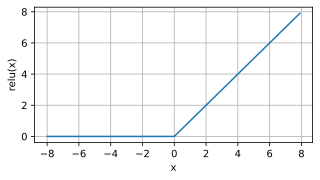

In [4]:
import torch
from d2l import torch as d2l
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

### sigmoid函数

*sigmoid函数*将定义域在$\mathbb{R}$中的输入变换为区间(0, 1)上的输出。因此，sigmoid通常称为*挤压函数*（Squashing function）：它将范围(-inf, inf)中的任意输入压缩到区间(0, 1)中的某个值：

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

注意，当输入接近0时，sigmoid函数接近线性变换。


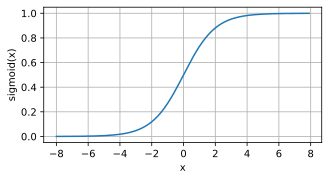

In [5]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

sigmoid函数的导数图像如下所示。注意，当输入为0时，sigmoid函数的导数达到最大值0.25。当输入在任一方向上远离0点时，导数会更靠近0。


### tanh函数

与sigmoid函数类似，tanh(双曲正切)函数也能将其输入压缩转换为区间(-1, 1)上。tanh函数的公式如下：

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

下面我们绘制tanh函数。注意，当输入在0附近时，tanh函数接近线性变换。函数的形状类似于sigmoid函数，不同的是tanh函数关于坐标系原点中心对称。


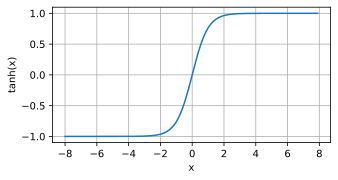

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。当输入接近0时，tanh函数的导数接近最大值1。与我们在sigmoid函数图像中看到的类似，当输入在任一方向上远离0点时，导数会更靠近0。


## 权重衰减

通过线性函数$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$中的权重向量的某个范数来度量其复杂性。<br>
如果我们的权重向量增长的太大，我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。这正是我们想要的。我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

<br>我们通过*正则化常数*$\lambda$来描述惩罚权重向量的大小，这是一个非负超参数，我们使用验证数据拟合：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$
<br>
$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为*套索回归*（lasso regression）。

在下面的代码中，我们在实例化优化器时直接通过weight_decay指定weight decay超参数。默认情况下，PyTorch同时衰减权重和偏移。这里我们只为权重设置了weight_decay，所以bias参数 b 不会衰减。

In [ ]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减。
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
            "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

## 丢弃法dropout

**这种方法之所以被称为 dropout** ，因为我们从表面上看是在训练过程中丢弃（drop out）一些神经元。在整个训练过程的每一次迭代中，dropout包括在计算下一层之前将当前层中的一些节点置零。<br>
在标准dropout正则化中，通过按保留（未丢弃）的节点的分数进行归一化来消除每一层的偏差。换言之，每个中间激活值$h$以*丢弃概率*$p$由随机变量$h'$替换，如下所示：

$$
\begin{aligned}
h' =
\begin{cases}
    0 & \text{ 概率为 } p \\
    \frac{h}{1-p} & \text{ 其他情况}
\end{cases}
\end{aligned}
$$

根据设计，期望值保持不变，即$E[h'] = h$。
通常，我们在测试时禁用dropout。给定一个训练好的模型和一个新的样本，我们不会丢弃任何节点，因此不需要标准化。

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
                    # 在第一个全连接层之后添加一个dropout层
                    nn.Dropout(dropout1), nn.Linear(256, 256), nn.ReLU(),
                    # 在第二个全连接层之后添加一个dropout层
                    nn.Dropout(dropout2), nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

# 数据处理工具箱概述

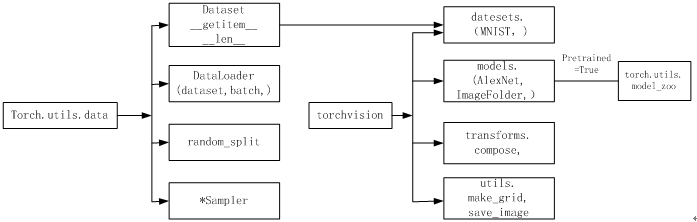

torch.utils.data工具包，它包括以下三个类：<br>
+ Dataset：是一个抽象类，其它数据集需要继承这个类，并且覆写其中的两个方法(__getitem__、__len__)。
+ DataLoader：定义一个新的迭代器，实现批量（batch）读取，打乱数据（shuffle）并提供并行加速等功能。
+ random_split：把数据集随机拆分为给定长度的非重叠新数据集。
+ *sampler：多种采样函数。

torchvision包括4个类，各类的主要功能如下：<br>
+ datasets:提供常用的数据集加载，设计上都是继承torch.utils.data.Dataset，主要包括MMIST、CIFAR10/100、ImageNet、COCO等。
+ models:提供深度学习中各种经典的网络结构以及训练好的模型(如果选择pretrained=True)，包括AlexNet, VGG系列、ResNet系列、Inception系列等。
+ transforms:常用的数据预处理操作，主要包括对Tensor及PIL Image对象的操作。
+ utils:含两个函数，一个是make_grid，它能将多张图片拼接在一个网格中；另一个是save_img，它能将Tensor保存成图片。

## Dataset

### 直接使用

In [ ]:
data.TensorDataset(*data_arrays)     # TensorDataset：包装数据和目标张量的数据集。
# *号加在实参数上，代表将输入迭代器拆成一个个元素

### 自定义数据集

utils.data包括Dataset和DataLoader。torch.utils.data.Dataset为抽象类。自定义数据集需要继承这个类，并实现两个函数。一个是__len__，另一个是__getitem__，前者提供数据的大小(size)，后者通过给定索引获取数据和标签。 __getitem__一次只能获取一个数据，所以通过torch.utils.data.DataLoader来定义一个新的迭代器，实现batch读取。首先我们来定义一个简单的数据集，然后具体使用Dataset及DataLoader，以便有个直观认识。

In [68]:
import torch
from torch.utils import data
import numpy as np

In [69]:
class TestDataset(data.Dataset):#继承Dataset
    def __init__(self):
        self.Data=np.asarray([[1,2],[3,4],[2,1],[3,4],[4,5]])#一些由2维向量表示的数据集
        self.Label=np.asarray([0,1,0,1,2])#这是数据集对应的标签

    def __getitem__(self, index):
        #把numpy转换为Tensor
        txt=torch.from_numpy(self.Data[index])
        label=torch.tensor(self.Label[index])
        return txt,label 

    def __len__(self):
        return len(self.Data)

In [3]:
Test=TestDataset()
print(Test[2])  #相当于调用__getitem__(2)
print(Test.__len__())

(tensor([2, 1], dtype=torch.int32), tensor(0, dtype=torch.int32))
5


## DataLoader

Dateset只负责数据的抽取，一次调用__getitem__只返回一个样本。如果希望批量处理(batch)，同时还要进行shuffle和并行加速等操作，可选择DataLoader。DataLoader的格式为：
```
data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    sampler=None,
    batch_sampler=None,
    num_workers=0,
    collate_fn=,
    pin_memory=False,
    drop_last=False,
    timeout=0,
    worker_init_fn=None,
)
```
+ dataset: 加载的数据集实例；
+ batch_size: 批大小；
+ shuffle：是否将数据打乱；
+ sampler：样本抽样
+ num_workers：使用多进程加载的进程数，0代表不使用多进程；
+ collate_fn：如何将多个样本数据拼接成一个batch，一般使用默认的拼接方式即可；
+ pin_memory：是否将数据保存在pin memory区，pin memory中的数据转到GPU会快一些；
+ drop_last：dataset 中的数据个数可能不是 batch_size的整数倍，drop_last为True会将多出来不足一个batch的数据丢弃。

In [7]:
test_loader = data.DataLoader(Test,batch_size=2,shuffle=False,num_workers=0)
for i,traindata in enumerate(test_loader):
    print('i:',i)
    Data,Label=traindata
    print('data:',Data)
    print('Label:',Label)

i: 0
data: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
Label: tensor([0, 1], dtype=torch.int32)
i: 1
data: tensor([[2, 1],
        [3, 4]], dtype=torch.int32)
Label: tensor([0, 1], dtype=torch.int32)
i: 2
data: tensor([[4, 5]], dtype=torch.int32)
Label: tensor([2], dtype=torch.int32)


使用迭代器

In [5]:
dataiter=iter(test_loader)
imgs,labels=next(dataiter)
#imgs.size()

一般用data.Dataset处理同一个目录下的数据。如果数据在不同目录下，不同目录代表不同类别（这种情况比较普遍），使用data.Dataset来处理就不很方便。不过，可以使用Pytorch另一种可视化数据处理工具（即torchvision）就非常方便，不但可以自动获取标签，还提供很多数据预处理、数据增强等转换函数。

## torchvision简介

torchvision有4个功能模块，model、datasets、transforms和utils。其中model后续章节将介绍，利用datasets下载一些经典数据集，3.2小节有实例，大家可以参考一下。这节我们将主要介绍如何使用datasets的ImageFolder处理自定义数据集，如何使用transforms对源数据进行预处理、增强等。下面我们重点介绍transforms及ImageFolder。

### transforms

transforms提供了对PIL Image对象和Tensor对象的常用操作。<br>
（1）对PIL Image的常见操作如下：<br>
 Scale/Resize: 调整尺寸，长宽比保持不变；<br>
 CenterCrop、RandomCrop、RandomSizedCrop：裁剪图片，CenterCrop和RandomCrop在crop时是固定size，RandomResizedCrop则是random size的crop；<br>
 Pad: 填充；<br>
 ToTensor: 把一个取值范围是[0,255]的PIL.Image 转换成 Tensor。形状为(H,W,C)的numpy.ndarray，转换成形状为[C,H,W]，取值范围是[0,1.0]的torch.FloatTensor。<br><br>
 RandomHorizontalFlip:图像随机水平翻转，翻转概率为0.5;<br>
 RandomVerticalFlip: 图像随机垂直翻转;<br>
 ColorJitter: 修改亮度、对比度和饱和度。<br>
（2）对Tensor的常见操作如下：<br>
 Normalize: 标准化，即减均值，除以标准差；<br>
 ToPILImage:将Tensor转为PIL Image。<br>
如果要对数据集进行多个操作，可通过Compose将这些操作像管道一样拼接起来，类似于nn.Sequential。以下为示例代码<br>

In [71]:
import torch
import torchvision
import torchvision.transforms as transforms

In [72]:
transforms.Compose([
    #将给定的 PIL.Image 进行中心切割，得到给定的 size，
    #size 可以是 tuple，(target_height, target_width)。
    #size 也可以是一个 Integer，在这种情况下，切出来的图片形状是正方形。            
    transforms.CenterCrop(10),
    #切割中心点的位置随机选取
    transforms.RandomCrop(20, padding=0),
    #把一个取值范围是 [0, 255] 的 PIL.Image 或者 shape 为 (H, W, C) 的 numpy.ndarray，
    #转换为形状为 (C, H, W)，取值范围是 [0, 1] 的 torch.FloatTensor
    transforms.ToTensor(),
    #规范化到[-1,1]
    # 三个通道的平均值和方差
    transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)) 
])

Compose(
    CenterCrop(size=(10, 10))
    RandomCrop(size=(20, 20), padding=0)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

### ImageFolder

tensor([0, 2, 0, 2, 1, 0, 2, 0])


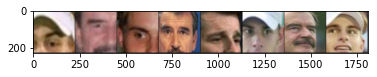

In [73]:
from torchvision import transforms, utils
from torchvision import datasets
import torch
import matplotlib.pyplot as plt 
%matplotlib inline

my_trans=transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
train_data = datasets.ImageFolder(r'F:\备份\PyTorch深度学习代码\torchvision_data', transform=my_trans)
train_loader = data.DataLoader(train_data,batch_size=8,shuffle=True,)
                                            
for i_batch, img in enumerate(train_loader):
    if i_batch == 0:
        print(img[1])
        fig = plt.figure()
        grid = utils.make_grid(img[0])
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.show()
#         保存图片
#         utils.save_image(grid,'test01.png')
    break


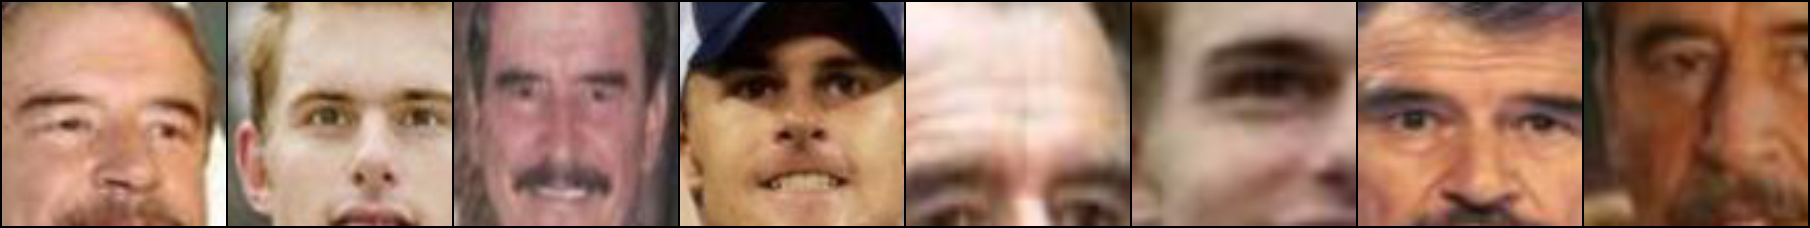

In [19]:
from PIL import Image
Image.open('test01.png')

## 可视化TensorboardX

Tensorboard是Google TensorFlow 的可视化工具，它可以记录训练数据、评估数据、网络结构、图像等，并且可以在web上展示，对于观察神经网路训练的过程非常有帮助。PyTorch可以采用tensorboard_logger, visdom等可视化工具，但这些方法比较复杂或不够友好。为解决这一问题，人们推出了可用于Pytorch可视化的新的更强大工具tensorboardX。

4.4.1 tensorboardX简介

使用tensorboardX的一般步骤为：<br>
+ （1）导入tensorboardX，实例化SummaryWriter类，指明记录日志路径等信息。

【说明】<br>
①如果是windows环境，log_dir注意路径解析，如
writer = SummaryWriter(log_dir=r'D:\myboard\test\logs')<br>
②SummaryWriter的格式为：
```
SummaryWriter(log_dir=None, comment='', **kwargs)  
#其中comment在文件命名加上comment后缀
```
③如果不写log_dir,系统将在当前目录创建一个runs的目录。

In [ ]:
from tensorboardX import SummaryWriter
#实例化SummaryWriter，并指明日志存放路径。在当前目录没有logs目录将自动创建。
writer = SummaryWriter(log_dir='logs')
#调用实例
writer.add_xxx()
#关闭writer
writer.close()

+ （2）调用相应的API接口，接口一般格式为：
```
add_xxx(tag-name, object, iteration-number)
#即add_xxx(标签，记录的对象，迭代次数)
```
+ （3）启动tensorboard服务<br>
cd到logs目录所在的同级目录，在命令行输入如下命令，logdir等式右边可以是相对路径或绝对路径。
```
tensorboard --logdir=logs --port 6006   
#如果是windows环境，要注意路径解析，如
#tensorboard --logdir=r'D:\myboard\test\logs' --port 6006
```

In [ ]:
!tensorboard --logdir=r"E:\All Files\Programmaing\Python\深度学习\PyTorch深度学习代码\PyTorch深度学习代码及数据\pytorch-04\logs" --port 6006

4.4.2用tensorboardX可视化神经网络

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tensorboardX import SummaryWriter

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.bn = nn.BatchNorm2d(20)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = F.relu(x) + F.relu(-x)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.bn(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

In [3]:
#定义输入
input = torch.rand(32, 1, 28, 28)
#实例化神经网络
model = Net()
#将model保存为graph
with SummaryWriter(log_dir='logs',comment='Net') as w:
    w.add_graph(model, (input, ))


4.4.3用tensorboardX可视化损失值

In [6]:
import torch
import torch.nn as nn
from tensorboardX import SummaryWriter
import numpy as np

input_size = 1
output_size = 1
num_epoches = 60
learning_rate = 0.01

dtype = torch.FloatTensor
writer = SummaryWriter(log_dir='logs',comment='Linear')
np.random.seed(100) 
x_train = np.linspace(-1, 1, 100).reshape(100,1) 
y_train = 3*np.power(x_train, 2) +2+ 0.2*np.random.rand(x_train.size).reshape(100,1) 


model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epoches):
    inputs = torch.from_numpy(x_train).type(dtype)
    targets = torch.from_numpy(y_train).type(dtype)

    output = model(inputs)
    loss = criterion(output, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 保存loss的数据与epoch数值
    writer.add_scalar('训练损失值', loss, epoch)
writer.close()

新版要把路径放在冒号里面
```
tensorboard --logdir "logs"  --port 6006 --host=127.0.0.1
```

打开浏览器可看到如下图形
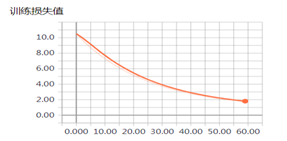

# 神经网络核心组件

从图3-2可知，构建网络层可以基于Module类或函数（nn.functional）。nn中的大多数层（layer）在functional中都有与之对应的函数。nn.functional中函数与nn.Module中的layer的主要区别是后者继承Module类，会自动提取可学习的参数。而nn.functional更像是纯函数。两者功能相同，性能也没有很大区别，那么如何选择呢？像卷积层、全连接层、dropout层等因含有可学习参数，一般使用nn.Module,而激活函数、池化层不含可学习参数，可以使用nn.functional中对应的函数。下面我们通过实例来说明如何使用nn构建一个网络模型。

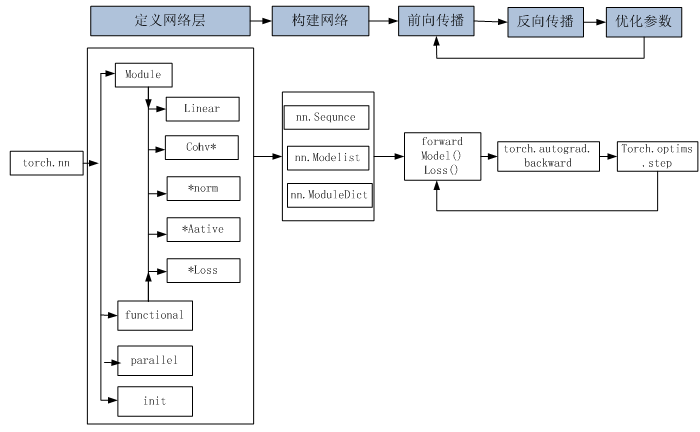

## 实现神经网络实例

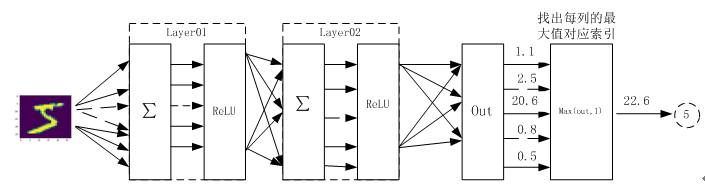

### 准备数据

In [1]:
import numpy as np
import torch
# 导入 pytorch 内置的 mnist 数据
from torchvision.datasets import mnist 
#import torchvision
#导入预处理模块
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
#导入nn及优化器
import torch.nn.functional as F
import torch.optim as optim
from torch import nn

In [ ]:
from tensorboardX import SummaryWriter
!tensorboard --logdir=r"F:\备份\PyTorch深度学习代码\PyTorch深度学习代码及数据\pytorch-03\logs" --port 6006

In [2]:
# 定义一些超参数
train_batch_size = 64
test_batch_size = 128
learning_rate = 0.01
num_epoches = 20

+ transforms.Compose可以把一些转换函数组合在一起；
+ Normalize([0.5], [0.5])对张量进行归一化，这里两个0.5分别表示对张量进行归一化的全局平均值和方差。因图像是灰色的只有一个通道，如果有多个通道，需要有多个数字，如三个通道，应该是Normalize([m1,m2,m3], [n1,n2,n3])
+ download参数控制是否需要下载，如果./data目录下已有MNIST，可选择False。
+ 用DataLoader得到生成器，这可节省内存。
+ torchvision及data的使用第4章将详细介绍。

In [6]:
#定义预处理函数
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5], [0.5])])
#下载数据，并对数据进行预处理
train_dataset = mnist.MNIST('../data', train=True, transform=transform, download=False)
test_dataset = mnist.MNIST('../data', train=False, transform=transform)
#得到一个生成器
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

分别是id，图像数据和数据标签

In [7]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [11]:
batch_idx, (example_data.shape, example_targets.shape)

(0, (torch.Size([128, 1, 28, 28]), torch.Size([128])))

### 可视化源数据

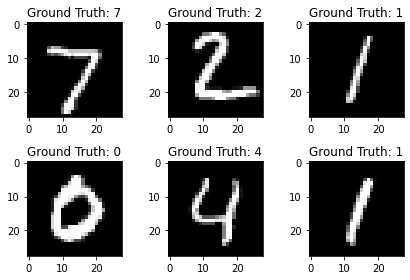

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()    # tight_layout会自动调整子图参数，使之填充整个图像区域。
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none') 
    plt.title("Ground Truth: {}".format(example_targets[i]))

### 构建模型

In [15]:
class Net(nn.Module):
    """
    使用sequential构建网络，Sequential()函数的功能是将网络的层组合到一起
    """
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Net, self).__init__()    # 调用父类Net的init 方法
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1),nn.BatchNorm1d(n_hidden_1))   
        # nn.Linear()分别是输入和输出数量
        # 进行批标准化(Batch Normalization)操作：nn.BatchNorm1d()是输入特征数
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2),nn.BatchNorm1d(n_hidden_2))
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, out_dim))
        
 
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [16]:
lr = 0.01
momentum = 0.9

In [17]:
#实例化模型
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#if torch.cuda.device_count() > 1:
#    print("Let's use", torch.cuda.device_count(), "GPUs")
#    # dim = 0 [20, xxx] -> [10, ...], [10, ...] on 2GPUs
#    model = nn.DataParallel(model)
model = Net(28 * 28, 300, 100, 10)
# 放入cpu
model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

### 训练模型

In [18]:
# 开始训练
losses = []
acces = []
eval_losses = []
eval_acces = []

# tensorboard
# writer = SummaryWriter(log_dir='logs',comment='train-loss')

for epoch in range(num_epoches):
    train_loss = 0
    train_acc = 0
    # model.train()的作用是启用batch normalization和drop out。
    model.train()  
    
    #动态修改参数学习率，每五轮将学习率乘0.9
    if epoch%5==0:
        optimizer.param_groups[0]['lr']*=0.9
        print(optimizer.param_groups[0]['lr'])
    for img, label in train_loader:
        img=img.to(device)
        label = label.to(device)
        img = img.view(img.size(0), -1)  # reshape为一维的
        # 前向传播
        out = model(img)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()  # 清空所有被优化过的Variable的梯度
        loss.backward()        
        optimizer.step()       # 进行单次优化 (参数更新)
        # 记录误差
        train_loss += loss.item()
        # 保存loss的数据与epoch数值
#         writer.add_scalar('Train', train_loss/len(train_loader), epoch)
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / img.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_loader))
    acces.append(train_acc / len(train_loader))
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    #net.eval() # 将模型改为预测模式
    model.eval()
    for img, label in test_loader:
        img=img.to(device)
        label = label.to(device)
        img = img.view(img.size(0), -1)
        out = model(img)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率，选择最大的类别
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / img.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_loader))
    eval_acces.append(eval_acc / len(test_loader))
    print('epoch: {}, Train Loss: {:.4f}, Train Acc: {:.4f}, Test Loss: {:.4f}, Test Acc: {:.4f}'
          .format(epoch, train_loss / len(train_loader), train_acc / len(train_loader), 
                     eval_loss / len(test_loader), eval_acc / len(test_loader)))

0.009000000000000001
epoch: 0, Train Loss: 0.2230, Train Acc: 0.9372, Test Loss: 0.0955, Test Acc: 0.9722
epoch: 1, Train Loss: 0.0871, Train Acc: 0.9742, Test Loss: 0.0722, Test Acc: 0.9767
epoch: 2, Train Loss: 0.0595, Train Acc: 0.9822, Test Loss: 0.0684, Test Acc: 0.9791
epoch: 3, Train Loss: 0.0455, Train Acc: 0.9860, Test Loss: 0.0560, Test Acc: 0.9809
epoch: 4, Train Loss: 0.0348, Train Acc: 0.9893, Test Loss: 0.0631, Test Acc: 0.9806
0.008100000000000001
epoch: 5, Train Loss: 0.0261, Train Acc: 0.9924, Test Loss: 0.0550, Test Acc: 0.9826
epoch: 6, Train Loss: 0.0208, Train Acc: 0.9938, Test Loss: 0.0535, Test Acc: 0.9837
epoch: 7, Train Loss: 0.0171, Train Acc: 0.9950, Test Loss: 0.0585, Test Acc: 0.9814
epoch: 8, Train Loss: 0.0141, Train Acc: 0.9960, Test Loss: 0.0558, Test Acc: 0.9822
epoch: 9, Train Loss: 0.0131, Train Acc: 0.9961, Test Loss: 0.0545, Test Acc: 0.9835
0.007290000000000001
epoch: 10, Train Loss: 0.0106, Train Acc: 0.9971, Test Loss: 0.0531, Test Acc: 0.9846
e

测试一下输出结果

In [36]:
data = next(examples)[1][0][0].view(next(examples)[1][0][0].size(0), -1).to(device)
out = model(data)
# out.max(1)输出最大值的标签
print(out,out.max(1),sep='\n')

tensor([[-2.3881, -4.6021, -3.6242,  7.4818, -3.0181, -0.8496, -3.4962,  0.6775,
         -1.1366, 16.3105]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.return_types.max(
values=tensor([16.3105], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([9], device='cuda:0'))


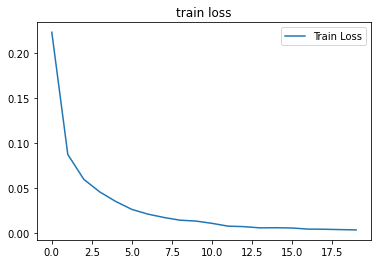

In [37]:
plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)
#plt.plot(np.arange(len(eval_losses)), eval_losses)
#plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.legend(['Train Loss'], loc='upper right')

In [30]:
# 将model保存为graph
writer.add_graph(model, (img,))
writer.close()

In [ ]:
!tensorboard --logdir=logs

In [19]:
class Net1(torch.nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv = torch.nn.Sequential(
            OrderedDict(
                [
                    ("conv1", torch.nn.Conv2d(3, 32, 3, 1, 1)),
                    ("relu1", torch.nn.ReLU()),
                    ("pool", torch.nn.MaxPool2d(2))
                ]
            ))

        self.dense = torch.nn.Sequential(
            OrderedDict([
                ("dense1", torch.nn.Linear(32 * 3 * 3, 128)),
                ("relu2", torch.nn.ReLU()),
                ("dense2", torch.nn.Linear(128, 10))
            ])
        )

### 优化器

In [20]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
 
# 超参数
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12
 
# 生成训练数据
# torch.unsqueeze() 的作用是将一维变二维，torch只能处理二维的数据
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)  
# 0.1 * torch.normal(x.size())增加噪点
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(*x.size()))
 


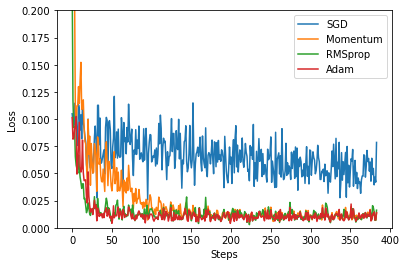

In [21]:
torch_dataset = Data.TensorDataset(x,y)
#得到一个代批量的生成器
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True)
 
 
class Net2(torch.nn.Module):
    # 初始化
    def __init__(self):
        super(Net2, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
 
    # 前向传递
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
 
net_SGD = Net2()
net_Momentum = Net2()
net_RMSProp = Net2()
net_Adam = Net2()
 
nets = [net_SGD, net_Momentum, net_RMSProp, net_Adam]
 
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.9)
opt_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSProp, opt_Adam]
 
loss_func = torch.nn.MSELoss()
 
loss_his = [[], [], [], []]  # 记录损失
 
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt,l_his in zip(nets, optimizers, loss_his):
            output = net(batch_x)  # get output for every net
            loss = loss_func(output, batch_y)  # compute loss for every net
            opt.zero_grad()  # clear gradients for next train
            loss.backward()  # backpropagation, compute gradients
            opt.step()  # apply gradients
            l_his.append(loss.data.numpy())  # loss recoder
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(loss_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()


## 层和块

### sequential

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

X = torch.rand(3, 20)
net(X)   # 直接获得模型的输出

tensor([[-0.1253, -0.1320,  0.0526,  0.0873, -0.1523,  0.0081,  0.0839, -0.0552,
         -0.2552,  0.0921],
        [-0.0763, -0.1677,  0.1127,  0.0958, -0.0912, -0.0590,  0.0976, -0.0500,
         -0.3891,  0.0438],
        [-0.0114, -0.1002,  0.0727,  0.0755, -0.1829, -0.1069,  0.2126,  0.0253,
         -0.4117,  0.0573]], grad_fn=<AddmmBackward>)

### 在前向传播函数中自定义控制

In [ ]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变。
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及`relu`和`dot`函数。
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数。
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

### 嵌套块以及其参数
1. 使用add_module方法添加子模块
2. 可以通过print来查看网络

In [6]:
def block1():
    return nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 4),
                         nn.ReLU())

def block2():
    net = nn.Sequential()
    for i in range(4):
        # 在这里嵌套
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(4, 1))
rgnet(X)

tensor([[0.0424],
        [0.0424]], grad_fn=<AddmmBackward>)

In [7]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


因为层是分层嵌套的，所以我们也可以像通过嵌套列表索引一样访问它们。例如，我们下面访问第一个主要的块，其中第二个子块的第一层的偏置项。


In [8]:
rgnet[0][1][0].bias.data

tensor([-0.1938, -0.2857, -0.4356, -0.0574,  0.1970, -0.1332,  0.3302,  0.2895])

In [9]:
rgnet[1].bias.data

tensor([0.1000])

## 初始化神经网络权重参数
两种方式：
1. 内置方法：使用nn.init构造一个初始化函数，再使用net.apply将此初始化函数递归应用于网络的每一个子模块上
2. 自定义：通过data指定

In [ ]:
net = nn.Sequential(nn.Linear(num_inputs, 1))
for param in net.parameters():
    param.data.normal_()

将所有权重参数初始化为标准差为0.01的高斯随机变量，且将偏置参数设置为0。


In [ ]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)

net.apply(init_normal)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([ 0.0104,  0.0022, -0.0064, -0.0095]), tensor(0.))

我们还可以将所有参数初始化为给定的常数（比如1）。


In [ ]:
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)

net.apply(init_constant)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

我们还可以[**对某些块应用不同的初始化方法**]。例如，下面我们使用Xavier初始化方法初始化第一层，然后第二层初始化为常量值42。


In [ ]:
def xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

net[0].apply(xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.1484,  0.2210,  0.3737, -0.3520])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


**自定义**：
有时，深度学习框架没有提供我们需要的初始化方法。在下面的例子中，我们使用以下的分布为任意权重参数$w$定义初始化方法：

$$
\begin{aligned}
    w \sim \begin{cases}
        U(5, 10) & \text{ with probability } \frac{1}{4} \\
            0    & \text{ with probability } \frac{1}{2} \\
        U(-10, -5) & \text{ with probability } \frac{1}{4}
    \end{cases}
\end{aligned}
$$


同样，我们实现了一个`my_init`函数来应用到`net`。


In [33]:
def my_init(m):
    if type(m) == nn.Linear:
        print(
            "Init",
            *[(name, param.shape) for name, param in m.named_parameters()][0])
        nn.init.uniform_(m.weight, -10, 10)
        m.weight.data *= m.weight.data.abs() >= 5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[ 7.7353, -0.0000, -9.6500,  7.8387],
        [-8.5784, -6.1520,  0.0000,  0.0000]], grad_fn=<SliceBackward>)

注意，我们始终可以直接设置参数。


In [ ]:
net[0].weight.data[:] += 1
net[0].weight.data[0, 0] = 42
net[0].weight.data[0]

tensor([42.,  1.,  1.,  1.])

## 自定义层

### 不带参数的层

In [10]:
import torch
import torch.nn.functional as F
from torch import nn

class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

### 带参数的层

这个权重不是一个模型参数，因此它永远不会被反向传播更新。然后，网络将这个固定层的输出通过一个全连接层。

In [ ]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变。
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及`relu`和`dot`函数。
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数。
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

定义具有参数的层，这些参数可以通过训练进行调整。我们可以使用内置函数来创建参数，这些函数提供一些基本的管理功能。比如管理访问、初始化、共享、保存和加载模型参数。这样做的好处之一是，我们不需要为每个自定义层编写自定义序列化程序。

现在，让我们实现自定义版本的全连接层。回想一下，该层需要两个参数，一个用于表示权重，另一个用于表示偏置项。在此实现中，我们使用ReLU作为激活函数。该层需要输入参数：`in_units`和`units`，分别表示输入和输出的数量。


In [ ]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))

    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)

接下来，我们实例化`MyLinear`类并访问其模型参数。


In [ ]:
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[ 0.1476, -1.2550,  0.0803],
        [-0.8999, -1.3699,  0.4572],
        [-0.1212,  0.2888, -0.7945],
        [ 0.7072,  0.4077,  0.6760],
        [-0.3221,  1.4658,  0.8462]], requires_grad=True)

我们可以[**使用自定义层直接执行正向传播计算**]。


In [ ]:
linear(torch.rand(2, 5))

tensor([[0.0000, 3.1955, 0.0000],
        [0.0000, 1.7145, 0.0637]])

我们还可以(**使用自定义层构建模型**)。我们可以像使用内置的全连接层一样使用自定义层。


In [ ]:
net = nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
net(torch.rand(2, 64))

tensor([[0.],
        [0.]])

In [1]:
import cv2

In [3]:
img = cv2.imread("C:/Users/Administrator/Desktop/853.jpg")
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

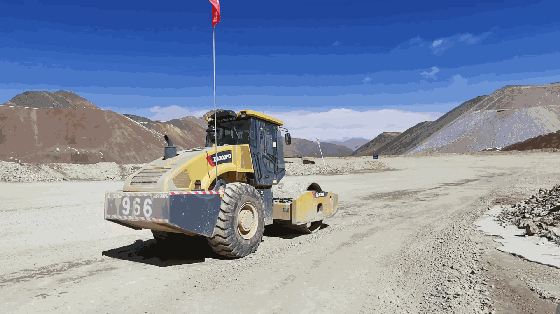

In [9]:
from PIL import Image
import numpy
img = Image.open("C:/Users/Administrator/Desktop/853.jpg",mode="r")
numpy.array(img).shape
img

In [13]:
import numpy as np
img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
img.shape
img

array([[[ 71,  71,  71],
        [ 71,  71,  71],
        [ 75,  75,  75],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 75,  75,  75],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       ...,

       [[174, 174, 174],
        [174, 174, 174],
        [176, 176, 176],
        ...,
        [ 39,  39,  39],
        [ 39,  39,  39],
        [ 47,  47,  47]],

       [[174, 174, 174],
        [174, 174, 174],
        [175, 175, 175],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[174, 174, 174],
        [174, 174, 174],
        [174, 174, 174],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]]

## 参数管理

### 神经网络输出

In [3]:
import torch
from torch import nn
# 输入是列数
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(size=(2, 4))
net(X)

tensor([[0.0768],
        [0.0699]], grad_fn=<AddmmBackward>)

In [4]:
net

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

### 神经网络参数
可通过直接获取，state_dict，named_parameter获取，但两者有不同：
1. 直接获取可以得到require_grad和grad等额外的信息
2. state_grad只能获取到权重和偏置的具体数值
3. net.named_parameters()和state_grad()没有太大区别
4. 每一层的输入输出可通过以下获取：
```python
X = torch.randn(size=(1, 1, 224, 224))
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)
```

一层的偏置

In [5]:
net[0].bias, net[0].bias.data,net[0].bias.grad

(Parameter containing:
 tensor([ 0.1302,  0.2645,  0.1775,  0.1427,  0.1888, -0.1929, -0.2384, -0.4900],
        requires_grad=True),
 tensor([ 0.1302,  0.2645,  0.1775,  0.1427,  0.1888, -0.1929, -0.2384, -0.4900]),
 None)

一层的梯度

In [5]:
net[0].weight
net[0].weight.data

tensor([[ 0.0335,  0.3527, -0.2940,  0.1263],
        [ 0.4164,  0.1946,  0.2371, -0.4405],
        [ 0.2201, -0.1207,  0.2029,  0.2894],
        [ 0.4880,  0.0658, -0.4456, -0.2034],
        [ 0.4985, -0.4911,  0.0966,  0.0415],
        [ 0.1084, -0.0407,  0.0859,  0.2725],
        [-0.4346, -0.3463, -0.1019,  0.3555],
        [-0.2879, -0.4718, -0.1626,  0.4901]])

一层的所有参数

In [6]:
net[2].state_dict()   # 返回模型的所有参数

OrderedDict([('weight',
              tensor([[-0.1685,  0.1868, -0.2806, -0.1810, -0.1144,  0.0985,  0.3391,  0.2763]])),
             ('bias', tensor([-0.0731]))])

所有层的参数

In [7]:
[layer.state_dict() for layer in net]

[OrderedDict([('weight', tensor([[ 0.0335,  0.3527, -0.2940,  0.1263],
                       [ 0.4164,  0.1946,  0.2371, -0.4405],
                       [ 0.2201, -0.1207,  0.2029,  0.2894],
                       [ 0.4880,  0.0658, -0.4456, -0.2034],
                       [ 0.4985, -0.4911,  0.0966,  0.0415],
                       [ 0.1084, -0.0407,  0.0859,  0.2725],
                       [-0.4346, -0.3463, -0.1019,  0.3555],
                       [-0.2879, -0.4718, -0.1626,  0.4901]])),
              ('bias',
               tensor([-0.3243, -0.3646, -0.1009,  0.4445, -0.1026, -0.2530, -0.3308, -0.0200]))]),
 OrderedDict(),
 OrderedDict([('weight',
               tensor([[-0.1685,  0.1868, -0.2806, -0.1810, -0.1144,  0.0985,  0.3391,  0.2763]])),
              ('bias', tensor([-0.0731]))])]

## 加载和保存模型参数

保存单个权重向量（或其他张量）确实是有用的，但是如果我们想保存整个模型，并在以后加载它们，单独保存每个向量则会变得很麻烦。毕竟，我们可能有数百个参数散布在各处。因此，深度学习框架提供了内置函数来保存和加载整个网络。需要注意的一个重要细节是，这将保存模型的参数而不是保存整个模型。例如，如果我们有一个3层多层感知机，我们需要单独指定结构。因为模型本身可以包含任意代码，所以模型本身难以序列化。因此，为了恢复模型，我们需要用代码生成结构，然后从磁盘加载参数。让我们从熟悉的多层感知机开始尝试一下。


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

接下来，我们[**将模型的参数存储为一个叫做“mlp.params”的文件。**]


In [ ]:
torch.save(net.state_dict(), 'mlp.params')

为了恢复模型，我们[**实例化了原始多层感知机模型的一个备份。**]我们没有随机初始化模型参数，而是(**直接读取文件中存储的参数。**)


In [ ]:
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

由于两个实例具有相同的模型参数，在输入相同的`X`时，两个实例的计算结果应该相同。让我们来验证一下。


In [ ]:
Y_clone = clone(X)
Y_clone == Y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

## 放入GPU训练

将变量放入GPU

In [ ]:
X = torch.ones(2, 3, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

将模型放入GPU

In [ ]:
net = nn.Sequential(nn.Linear(3, 1))
net = net.to(device=try_gpu())

# 卷积神经网络

卷积神经网络结构：

1. 平移不变性：不管出现在图像中的哪个位置，神经网络的底层应该对相同的图像区域做出类似的响应。这个原理即为“平移不变性”。
1. 局部性：神经网络的底层应该只探索输入图像中的局部区域，而不考虑图像远处区域的内容，这就是“局部性”原则。最终，这些局部特征可以融会贯通，在整个图像级别上做出预测。

**卷积就是共享权重的全连接层**
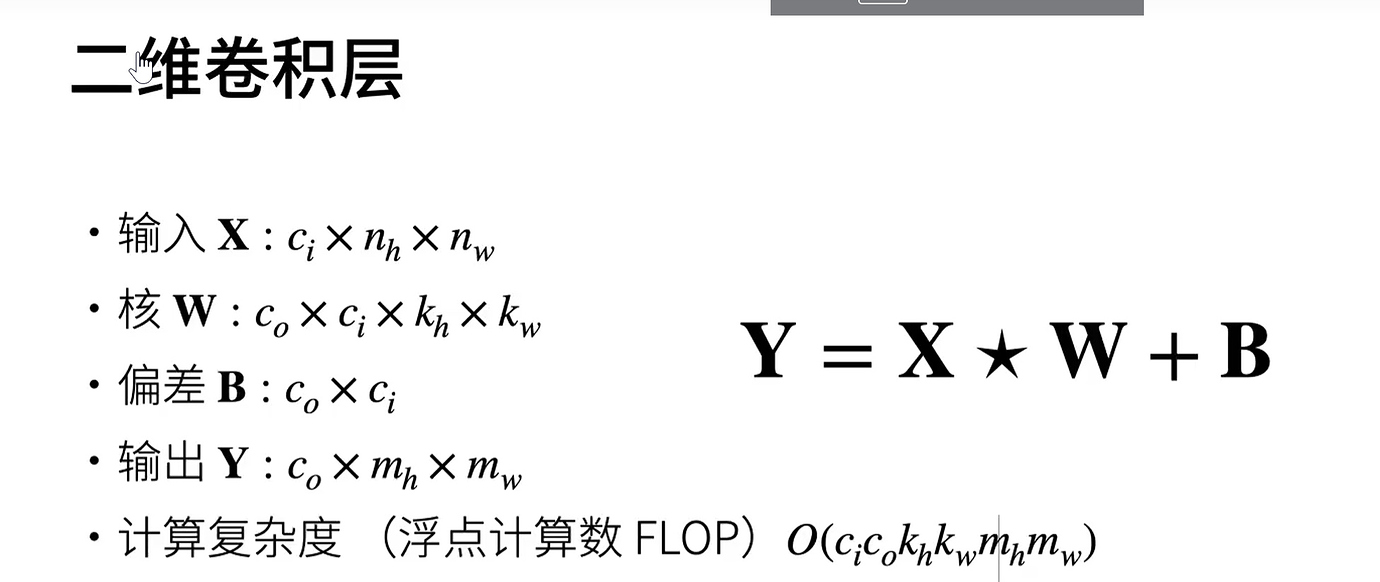

## 互相关运算

严格来说，卷积层是个错误的叫法，因为它所表达的运算其实是 互相关运算 (cross-correlation)，而不是卷积运算。 

输出大小等于输入大小 $n_h \times n_w$ 减去卷积核大小 $k_h \times k_w$，即：

$$(n_h-k_h+1) \times (n_w-k_w+1).$$

## 填充
**加多少行（列）就增加多少行（列）**

如果我们添加 $p_h$ 行填充（大约一半在顶部，一半在底部）和 $p_w$ 列填充（左侧大约一半，右侧半），则输出形状将为

$$(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1)。$$
<br>在许多情况下，我们需要设置 $p_h=k_h-1$ 和 $p_w=k_w-1$，使输入和输出具有相同的高度和宽度。
<br>**一般使用奇数卷积核，这样填充为偶数，左右填充相等**
<br>**pytorch里的padding只输入一个值表示的是全部填充为1x（即每行每列的p都是2x）**

In [1]:
import torch
from torch import nn

# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [2]:
conv2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1))  # 长左右两边都加2，宽左右都加1
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

## 步幅
**输出等于长宽除以对应步幅**

通常，当垂直步幅为 $s_h$ 、水平步幅为 $s_w$ 时，输出形状为

$$\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor.$$

如果我们设置了 $p_h=k_h-1$ 和 $p_w=k_w-1$，则输出形状将简化为 $\lfloor(n_h+s_h-1)/s_h\rfloor \times \lfloor(n_w+s_w-1)/s_w\rfloor$。
更进一步，如果输入的高度和宽度可以被垂直和水平步幅整除，则输出形状将为 $(n_h/s_h) \times (n_w/s_w)$。

In [5]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [6]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

## 多输入多输出通道

多输入通道单输出通道的输出是互相关运算结果的叠加。
单个通道的输出只需要$c_i\times k_h\times k_w$即可
<br> 多输出通道是由每个输出通道的卷积核张量$c_i\times k_h\times k_w$计算，因此卷积核的形状是$c_o\times c_i\times k_h\times k_w$。

## $1\times1$卷积层

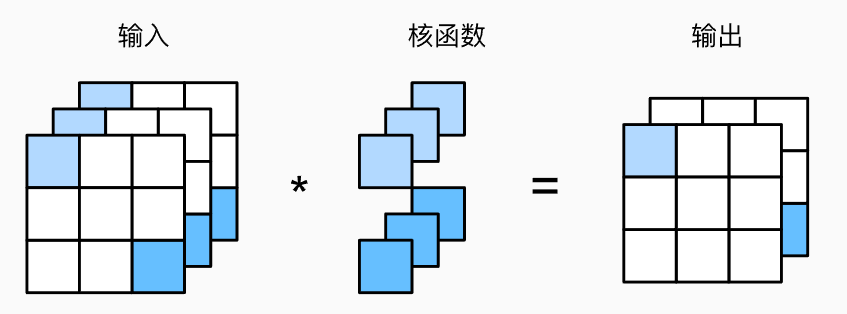
+ 1×1卷积的唯一计算发生在通道上，作用是改变通道数
+ 可以将  1×1  卷积层看作是在每个像素位置应用的全连接层
+ 卷积层的权重维度为：$c_o\times c_i$，在这个图上就是6个维度，上面三个和输入形成一个输出，下面同理

## 池化层
**两个作用**：
+ 降低卷积层对位置的敏感性
+ 降低对空间降采样表示的敏感性。

<br>**要点**：
+ 池化层只会在单个通道计算，因此输出通道数与输入通道数相同
+ 池化层的输入输出宽高计算和卷积层相同
+ 有最大池化和平均池化
+ 默认情况下，深度学习框架中的步幅与池化窗口的大小相同。 因此，如果我们使用形状为 (3, 3) 的池化窗口，那么默认情况下，我们得到的步幅形状为 (3, 3)。

In [19]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [20]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [21]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

## torch中的conv2d使用
1. torch.nn.Conv2d中的输入不能是单张图片，必须是批量的，也就是说输入数据的维度是：batch_num*(输入图片维度)
2. torch.nn.Flatten()：将向量展平为一个tensor，这里也是有批量的，也就是说返回的为维度是：batch_num\*展平后的个数

In [ ]:
net0 = torch.nn.Conv2d(3,64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
net0(test_iterdata[0]).shape

In [3]:
import torch
net = torch.nn.Sequential(torch.nn.Flatten(),torch.nn.Linear(9,1))
net(torch.rand(2,3,3))

tensor([[0.0267],
        [0.0475]], grad_fn=<AddmmBackward>)

# 计算机视觉

## 图像增广

+ 图像增广在对训练图像进行一系列的随机变化之后，生成相似但不同的训练样本，从而扩大了训练集的规模。
+ 随机改变训练样本可以减少模型对某些属性的依赖，从而提高模型的泛化能力。

## 微调——迁移学习

微调是迁移学习的常用技巧，包括四个步骤：

1. 在源数据集（例如 ImageNet 数据集）上预训练神经网络模型，即 *源模型*。
1. 创建一个新的神经网络模型，即 *目标模型*。这将复制源模型上的所有模型设计及其参数，但输出层除外。我们假定这些模型参数包含从源数据集中学到的知识，这些知识也将适用于目标数据集。我们还假设源模型的输出图层与源数据集的标签密切相关；因此不在目标模型中使用该图层。
1. 向目标模型添加输出图层，其输出数量是目标数据集中的类别数。然后随机初始化该层的模型参数。
1. 在目标数据集（如椅子数据集）上训练目标模型。输出图层将从头开始进行训练，而所有其他图层的参数将根据源模型的参数进行微调。

+ 输出层中的模型参数是随机初始化的，通常需要更高的学习率

In [ ]:
# 如果 `param_group=True`，输出层中的模型参数将使用十倍的学习率
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(
        torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                         transform=train_augs),
        batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(
        torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'),
                                         transform=test_augs),
        batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none")
    if param_group:
        # params_1x中存放的是所有非输出层的参数
        params_1x = [
            param for name, param in net.named_parameters()
            if name not in ["fc.weight", "fc.bias"]]
        # 对输出层特别指定学习率
        trainer = torch.optim.SGD([{
            'params': params_1x}, {
                'params': net.fc.parameters(),
                'lr': learning_rate * 10}], lr=learning_rate,
                                  weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
                   devices)

## 目标检测

### 边界框
在目标检测中，我们通常使用边界框（bounding box）来描述对象的空间位置。 边界框是矩形的，由矩形左上角的  𝑥  和  𝑦  坐标以及右下角的坐标决定。 另一种常用的边界框表示方法是边界框中心的  (𝑥,𝑦)  轴坐标以及框的宽度和高度。

### 锚框（anchor box）
锚框：每个像素为中心生成多个大小和宽高比（aspect ratio）不同的边界框

步骤：
1. 提出多个锚框区域
2. 预测锚框区域内是否含有关注的物体（分类）
3. 如果有，预测锚框到真实边缘框的偏移

### 使用交并比将真实边界框分配给锚框
我们知道 *Jaccard 系数* 可以衡量两组之间的相似性。
给定集合 $\mathcal{A}$ 和 $\mathcal{B}$，他们的 Jaccard 系数是他们交集的大小除以他们并集的大小：  

$$J(\mathcal{A},\mathcal{B}) = \frac{\left|\mathcal{A} \cap \mathcal{B}\right|}{\left| \mathcal{A} \cup \mathcal{B}\right|}.$$

事实上，我们可以将任何边界框的像素区域视为一组像素。通
过这种方式，我们可以通过其像素集的 Jaccard 索引来测量两个边界框的相似性。
对于两个边界框，我们通常将他们的 Jaccard 指数称为 *交并比* (intersection over union，IoU)，即两个边界框相交面积与相并面积之比，如 :numref:`fig_iou` 所示。
交并比的取值范围在0和1之间：0表示两个边界框无重合像素，1表示两个边界框完全重合。 

![交并比是两个边界框相交面积与相并面积之比。](http://d2l.ai/_images/iou.svg)

给定图像，假设锚框是 $A_1, A_2, \ldots, A_{n_a}$，真实边界框是 $B_1, B_2, \ldots, B_{n_b}$，其中 $n_a \geq n_b$。
让我们定义一个矩阵 $\mathbf{X} \in \mathbb{R}^{n_a \times n_b}$，其中 $i^\mathrm{th}$ 行和 $j^\mathrm{th}$ 列中的元素 $x_{ij}$ 是锚框 $A_i$ 和真实边界框 $B_j$的 IoU 。
该算法包含以下步骤：

1. 在矩阵 $\mathbf{X}$ 中找到最大的元素，并将它的行索引和列索引分别表示为 $i_1$ 和 $j_1$。然后将真实边界框 $B_{j_1}$ 分配给锚框 $A_{i_1}$。这很直观，因为 $A_{i_1}$ 和 $B_{j_1}$ 是所有锚框和真实边界框配对中最相近的。在第一个分配完成后，丢弃矩阵中 ${i_1}^\mathrm{th}$ 行和 ${j_1}^\mathrm{th}$ 列中的所有元素。 
1. 在矩阵 $\mathbf{X}$ 中找到剩余元素中最大的元素，并将它的行索引和列索引分别表示为 $i_2$ 和 $j_2$。我们将真实边界框 $B_{j_2}$ 分配给锚框 $A_{i_2}$ ，并丢弃矩阵中 ${i_2}^\mathrm{th}$ 行和 ${j_2}^\mathrm{th}$ 列中的所有元素。
1. 此时，矩阵 $\mathbf{X}$ 中两行和两列中的元素已被丢弃。我们继续，直到丢弃掉矩阵 $\mathbf{X}$ 中 $n_b$ 列中的所有元素。此时，我们已经为这 $n_b$ 个锚框各自分配了一个真实边界框。
1. 只遍历剩下的 $n_a - n_b$ 个锚框。例如，给定任何锚框 $A_i$，在矩阵 $\mathbf{X}$ 的第 $i^\mathrm{th}$ 行中找到与 $A_i$ 的IoU最大 的真实边界框 $B_j$ ，只有当此 IoU 大于预定义的阈值时，才将 $B_j$ 分配给 $A_i$。


让我们用一个具体的例子来说明上述算法。
如 :numref:`fig_anchor_label`（左）所示，假设矩阵 $\mathbf{X}$ 中的最大值为 $x_{23}$，我们将真实边界框 $B_3$ 分配给锚框 $A_2$。
然后，我们丢弃矩阵第 2 行和第 3 列中的所有元素，在剩余元素（阴影区域）中找到最大的 $x_{71}$，然后将真实边界框 $B_1$ 分配给锚框 $A_7$。
接下来，如 :numref:`fig_anchor_label`（中）所示，丢弃矩阵第 7 行和第 1 列中的所有元素，在剩余元素（阴影区域）中找到最大的 $x_{54}$，然后将真实边界框 $B_4$ 分配给锚框 $A_5$。
最后，如 :numref:`fig_anchor_label`（右）所示，丢弃矩阵第 5 行和第 4 列中的所有元素，在剩余元素（阴影区域）中找到最大的 $x_{92}$，然后将真实边界框 $B_2$ 分配给锚框 $A_9$。
之后，我们只需要遍历剩余的锚框 $A_1, A_3, A_4, A_6, A_8$，然后根据阈值确定是否为它们分配真实边界框。  

![将真实边界框分配给锚框。](https://zh-v2.d2l.ai/_images/anchor-label.svg)

### 使用非极大值抑制预测边界框

当有许多锚框时，可能会输出许多相似的具有明显重叠的预测边界框，都围绕着同一目标。
为了简化输出，我们可以使用 *非极大值抑制* (non-maximum suppression，NMS)合并属于同一目标的类似的预测边界框。 

以下是非极大值抑制的工作原理。
对于一个预测边界框 $B$，目标检测模型会计算每个类的预测概率。
假设最大的预测概率为 $p$ ，则该概率所对应的类别 $B$ 即为预测的类别。
具体来说，我们将 $p$ 称为预测边界框 $B$ 的*置信度*。
在同一张图像中，所有预测的非背景边界框都按置信度降序排序，以生成列表 $L$。然后我们通过以下步骤操作排序列表 $L$： 

1. 从 $L$ 中选取置信度最高的预测边界框 $B_1$ 作为基准，然后将所有与 $B_1$ 的IoU 超过预定阈值 $\epsilon$ 的非基准预测边界框从 $L$ 中移除。这时，$L$ 保留了置信度最高的预测边界框，去除了与其太过相似的其他预测边界框。简而言之，那些具有 *非极大值* 置信度的边界框被 *抑制* 了。
1. 从 $L$ 中选取置信度第二高的预测边界框 $B_2$ 作为又一个基准，然后将所有与 $B_2$ 的IoU大于 $\epsilon$ 的非基准预测边界框从 $L$ 中移除。
1. 重复上述过程，直到 $L$ 中的所有预测边界框都曾被用作基准。此时， $L$ 中任意一对预测边界框的IoU都小于阈值 $\epsilon$ ；因此，没有一对边界框过于相似。 
1. 输出列表 $L$ 中的所有预测边界框。

# 循环神经网络

## 序列模型

+ 自回归模型（autoregressive models）：使用观测序列 $x_{t-1}, \ldots, x_{t-\tau}$
+ 隐变量自回归模型（latent autoregressive models）：保留一些对过去观测的总结 $h_t$，并且同时更新预测 $\hat{x}_t$ 和总结 $h_t$。这就产生了基于 $\hat{x}_t = P(x_t \mid h_{t})$ 估计 $x_t$，以及公式 $h_t = g(h_{t-1}, x_{t-1})$ 更新的模型。由于 $h_t$ 从未被观测到，这类模型也被称为 *隐变量自回归模型*（latent autoregressive mode

**马尔可夫模型**

回想一下，在自回归模型的近似法中，我们使用 $x_{t-1}, \ldots, x_{t-\tau}$ 而不是 $x_{t-1}, \ldots, x_1$ 来估计 $x_t$。只要这种近似是精确的，我们就说序列满足 *马尔可夫条件*（Markov condition）。特别是，如果 $\tau = 1$，得到一个 *一阶马尔可夫模型*（first-order Markov model），$P(x)$ 由下式给出：

$$P(x_1, \ldots, x_T) = \prod_{t=1}^T P(x_t \mid x_{t-1}) \text{ where } P(x_1 \mid x_0) = P(x_1).$$

## 文本预处理
这些步骤通常包括：

1. 将文本作为字符串加载到内存中。
1. 将字符串拆分为词元（如单词和字符）。
1. 建立一个词汇表，将拆分的词元映射到数字索引。
1. 将文本转换为数字索引序列，方便模型操作。

In [1]:
import collections
import re
from d2l import torch as d2l

In [2]:
#@save
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt',
                                '090b5e7e70c295757f55df93cb0a180b9691891a')

def read_time_machine():  #@save
    """Load the time machine dataset into a list of text lines."""
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

lines = read_time_machine()
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the
